#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model1 = Sequential()

#卷積層1
model1.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model1.add(Dropout(rate=0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model1.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model1.add(Flatten())
model1.add(Dropout(rate=0.25))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [9]:
try:
    model1.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [10]:
import keras
model2= keras.models.clone_model(model1)
model3= keras.models.clone_model(model1)

model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary_crossentropy"\n查看Train/test accurancy and loss rate\n'

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(history, para1, para2, para3=None, para4=None):
    if para3 == None or para4 == None:
        plt.figure(figsize=(6,4))
    else:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
    plt.plot(history.history[para1])
    plt.plot(history.history[para2])
    plt.title('Train History')
    plt.ylabel(para1)
    plt.xlabel('Epoch')
    plt.legend([para1, para2], loc='upper left')
    if para3 == None or para4 == None:
        plt.show()
    else:
        plt.subplot(122)
        plt.plot(history.history[para3])
        plt.plot(history.history[para4])
        plt.title('Train History')
        plt.ylabel(para3)
        plt.xlabel('Epoch')
        plt.legend([para3, para4], loc='upper left')
        plt.subplots_adjust(wspace =0.3, hspace =0)
        plt.show()

In [13]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = [None]*3
test_history = [None]*3

for i, model in enumerate([model1, model2, model3]):
    train_history[i] = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     
    test_history[i] = model.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=128, verbose=1, sample_weight=None)
    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 13s 336us/step - loss: 1.3192 - accuracy: 0.5299 - val_loss: 1.4010 - val_accuracy: 0.5456
Epoch 2/12
37500/37500 [==============================] - 13s 336us/step - loss: 1.2973 - accuracy: 0.5370 - val_loss: 1.3877 - val_accuracy: 0.5458
Epoch 3/12
37500/37500 [==============================] - 13s 341us/step - loss: 1.2779 - accuracy: 0.5443 - val_loss: 1.3335 - val_accuracy: 0.5600
Epoch 4/12
37500/37500 [==============================] - 13s 350us/step - loss: 1.2645 - accuracy: 0.5506 - val_loss: 1.3120 - val_accuracy: 0.5737
Epoch 5/12
37500/37500 [==============================] - 13s 355us/step - loss: 1.2384 - accuracy: 0.5588 - val_loss: 1.3027 - val_accuracy: 0.5714
Epoch 6/12
37500/37500 [==============================] - 14s 367us/step - loss: 1.2220 - accuracy: 0.5636 - val_loss: 1.2817 - val_accuracy: 0.5813
Epoch 7/12
37500/37500 [==============================] 

Loss function : categorical_crossentropy


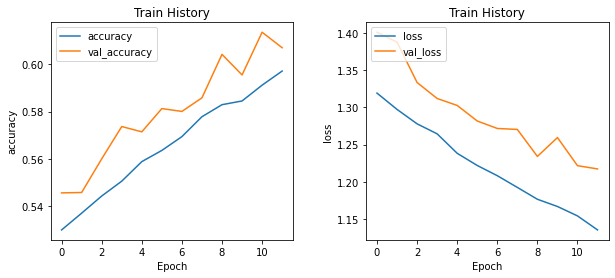

Test loss : 1.2076721593856812
Test acc  : 0.6022999882698059


Loss function : MSE


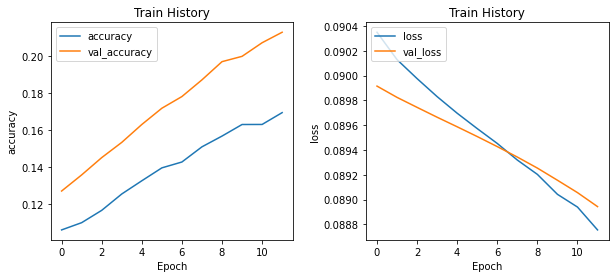

Test loss : 0.08895017013549805
Test acc  : 0.2150000035762787


Loss function : binary_crossentropy


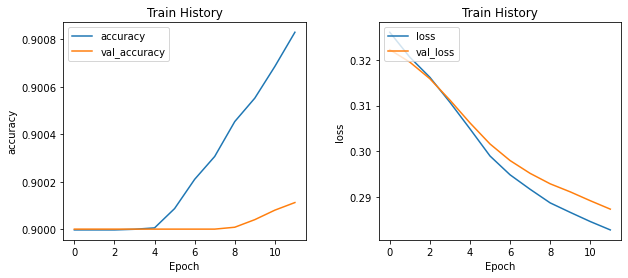

Test loss : 0.28625667715072634
Test acc  : 0.900080680847168




In [50]:
loss_f = ["categorical_crossentropy", "MSE", "binary_crossentropy"]

for i, name in enumerate(loss_f):
    print(f"Loss function : {name}")
    show_train_history(train_history[i],'accuracy','val_accuracy','loss','val_loss')
    #show_train_history(train_history[i],'loss','val_loss')   
    print(f"Test loss : {test_history[i][0]}")
    print(f"Test acc  : {test_history[i][1]}")
    print("\n")